# DATA ANALYTICS CASE_STUDY (GOV)

# V. ADITYA BHARADWAJ
# 2211CS010585
# GROUP 3

**IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**


In [3]:
df2 = pd.read_csv("INDIGO_Fleet(2).csv")
df2

,Year,Total Fleet Size,A320-200,A321neo,ATR 72-600,Boeing 777-300ER
0,2007-08,17,17,0,0,0
1,2008-09,19,19,0,0,0
2,2009-10,25,25,0,0,0
3,2010-11,38,38,0,0,0
4,2011-12,55,55,0,0,0
5,2012-13,66,66,0,0,0
6,2013-14,77,77,0,0,0
7,2014-15,94,94,0,0,0
8,2015-16,107,107,0,0,0
9,2016-17,131,131,0,0,0


**Information of Data Frame**

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              18 non-null     object
 1   Total Fleet Size  18 non-null     int64 
 2   A320-200          18 non-null     int64 
 3   A321neo           18 non-null     int64 
 4   ATR 72-600        18 non-null     int64 
 5   Boeing 777-300ER  18 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 996.0+ bytes


**Understanding the Shape of the dataframe**

In [5]:
df2.shape

(18, 6)

**Total data is considered for past 18 years**

In [6]:
df2['Year'].value_counts().sum()

18

**Total Fleet Growth Over the Years**

In [37]:
df2["Fleet Growth"] = df2["Total Fleet Size"].diff().fillna(0).astype(int)
df2

,Year,Total Fleet Size,A320-200,A321neo,ATR 72-600,Boeing 777-300ER,Fleet Growth
0,2007-08,17,17,0,0,0,0
1,2008-09,19,19,0,0,0,2
2,2009-10,25,25,0,0,0,6
3,2010-11,38,38,0,0,0,13
4,2011-12,55,55,0,0,0,17
5,2012-13,66,66,0,0,0,11
6,2013-14,77,77,0,0,0,11
7,2014-15,94,94,0,0,0,17
8,2015-16,107,107,0,0,0,13
9,2016-17,131,131,0,0,0,24


**Average fleet size over time of Airbus 320**

In [8]:
avg_fleet_a320 = df2["A320-200"].mean()
print(f"A320-200: {avg_fleet_a320:.2f}")

A320-200: 94.11


**Average fleet size over time of Airbus 321-Neo**

In [9]:
avg_fleet_a321 = df2["A321neo"].mean()
print(f"A321neo: {avg_fleet_a321:.2f}")

A321neo: 31.67


**Average fleet size over time of ATR 72-600**

In [10]:
avg_fleet_atr = df2["ATR 72-600"].mean()
print(f"ATR 72-600: {avg_fleet_atr:.2f}")


ATR 72-600: 11.94


**Average fleet size over time of Boeing 777-300ER**

In [11]:
avg_fleet_b777 = df2["Boeing 777-300ER"].mean()
print(f"Boeing 777-300ER: {avg_fleet_b777:.2f}")

Boeing 777-300ER: 2.78


**Year with the Highest Fleet Growth**

In [12]:
max_fleet_growth = df2.loc[df2["Fleet Growth"].idxmax(), ["Year", "Fleet Growth", "A320-200", "A321neo", "ATR 72-600", "Boeing 777-300ER"]]
max_fleet_growth

Year                2018-19
Fleet Growth             25
A320-200                140
A321neo                  20
ATR 72-600               15
Boeing 777-300ER          0
Name: 11, dtype: object

**Years where at least one aircraft has more than 100 aircrafts**

In [13]:
greater_100 = df2[df2.iloc[:, 2:].gt(100).any(axis=1)][["Year"]]
print( greater_100)

       Year
8   2015-16
9   2016-17
10  2017-18
11  2018-19
12  2019-20
13  2020-21
14  2021-22
15  2022-23
16  2023-24
17  2024-25


**Filter years where at least one aircraft has fleet size < 100**

In [14]:
years_less_100 = df2[df2.iloc[:, 2:].lt(100).any(axis=1)][["Year"]]

print("Years where at least one aircraft has less than 100 aircrafts:")
print(years_less_100.to_string(index=False))

Years where at least one aircraft has less than 100 aircrafts:
   Year
2007-08
2008-09
2009-10
2010-11
2011-12
2012-13
2013-14
2014-15
2015-16
2016-17
2017-18
2018-19
2019-20
2020-21
2021-22
2022-23
2023-24
2024-25


**Updated Data frame with new columns**

In [15]:
df2

,Year,Total Fleet Size,A320-200,A321neo,ATR 72-600,Boeing 777-300ER,Fleet Growth
0,2007-08,17,17,0,0,0,0
1,2008-09,19,19,0,0,0,2
2,2009-10,25,25,0,0,0,6
3,2010-11,38,38,0,0,0,13
4,2011-12,55,55,0,0,0,17
5,2012-13,66,66,0,0,0,11
6,2013-14,77,77,0,0,0,11
7,2014-15,94,94,0,0,0,17
8,2015-16,107,107,0,0,0,13
9,2016-17,131,131,0,0,0,24


# Using Matplotlib

**Fleet Growth Trend - Fleet Growth Trend**

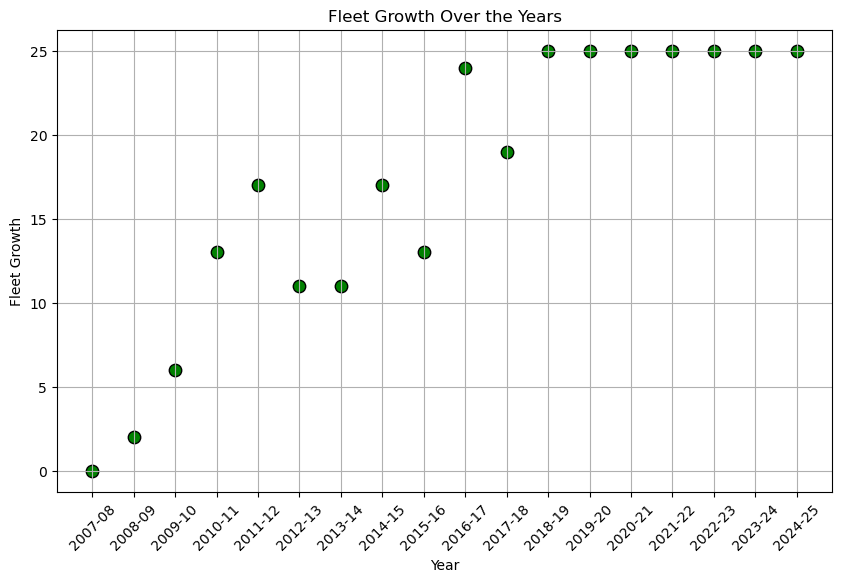

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df2["Year"], df2["Fleet Growth"], color="Green", s=80, edgecolors="black")
plt.title("Fleet Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Fleet Growth")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Fleet Growth Distribution - Histogram**

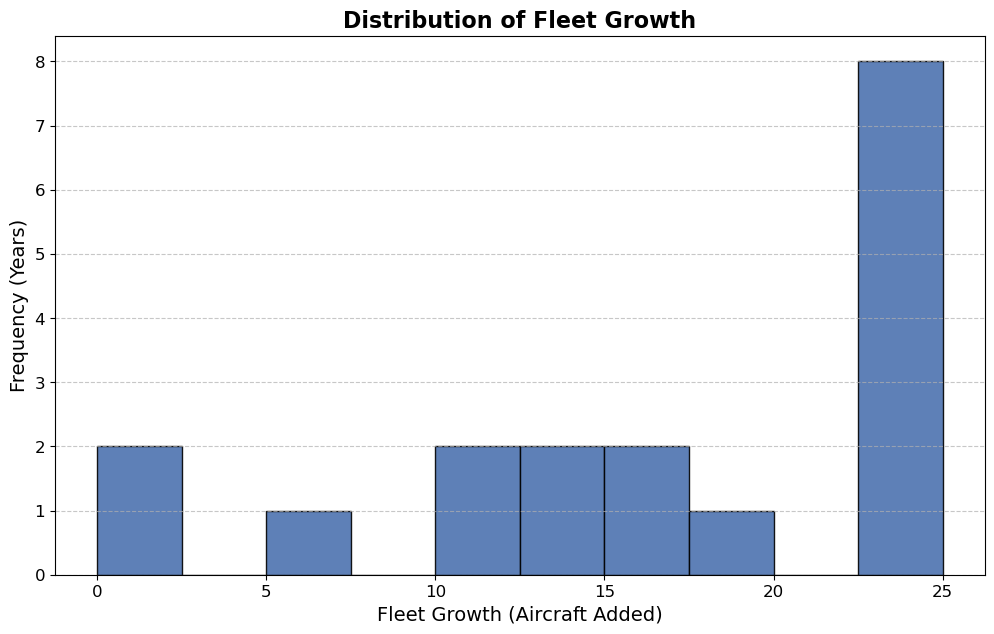

In [17]:
plt.figure(figsize=(12, 7))
plt.hist(df2["Fleet Growth"], bins=10, color="#4c72b0", edgecolor="black", alpha=0.9)
plt.title("Distribution of Fleet Growth", fontsize=16, fontweight="bold")
plt.xlabel("Fleet Growth (Aircraft Added)", fontsize=14)
plt.ylabel("Frequency (Years)", fontsize=14)
plt.xticks(range(int(df2["Fleet Growth"].min()), int(df2["Fleet Growth"].max()) + 5, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Bar Chart - Aircraft Fleet Sizes**

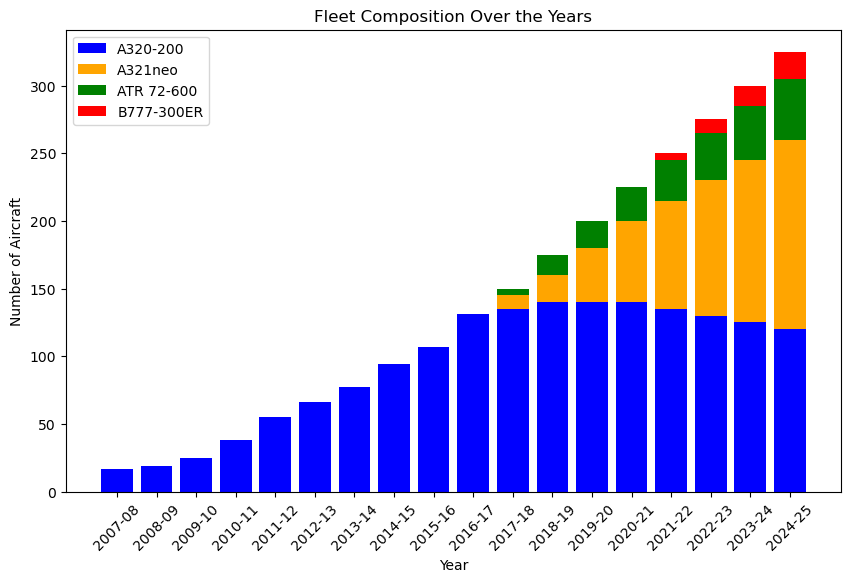

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(df2["Year"], df2["A320-200"], color="blue", label="A320-200")
plt.bar(df2["Year"], df2["A321neo"], bottom=df2["A320-200"], color="orange", label="A321neo")
plt.bar(df2["Year"], df2["ATR 72-600"], bottom=df2["A320-200"] + df2["A321neo"], color="green", label="ATR 72-600")
plt.bar(df2["Year"], df2["Boeing 777-300ER"], bottom=df2["A320-200"] + df2["A321neo"] + df2["ATR 72-600"], color="red", label="B777-300ER")
plt.title("Fleet Composition Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Aircraft")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Box Plot - Fleet Growth Distribution**

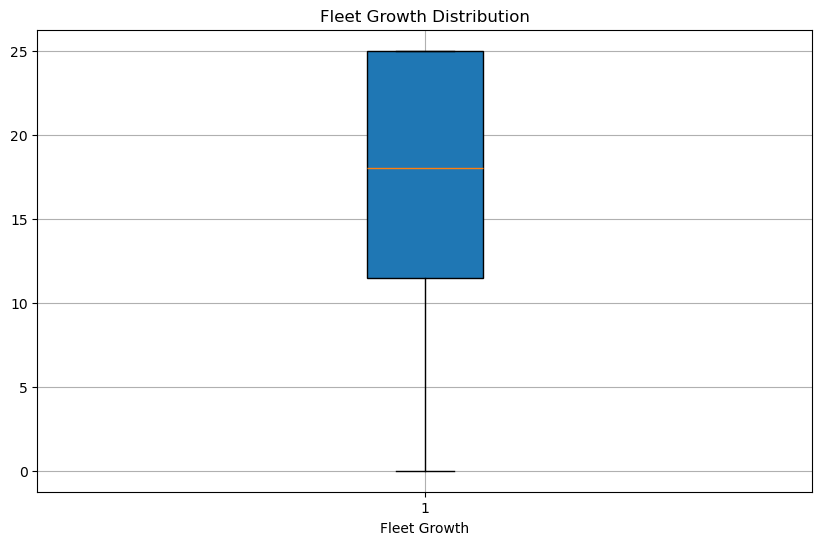

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(df2["Fleet Growth"], vert=True, patch_artist=True)
plt.title("Fleet Growth Distribution")
plt.xlabel("Fleet Growth")
plt.grid()
plt.show()

**Line Plot - Total Fleet Growth Over the Years**

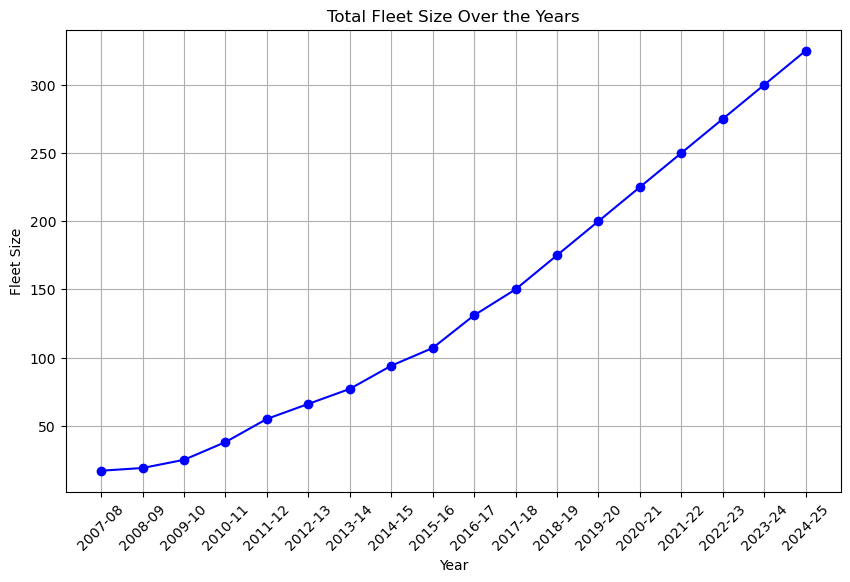

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df2["Year"], df2["Total Fleet Size"], marker="o", linestyle="-", color="b")
plt.title("Total Fleet Size Over the Years")
plt.xlabel("Year")
plt.ylabel("Fleet Size")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Bar Plot - Yearly Fleet Growth**

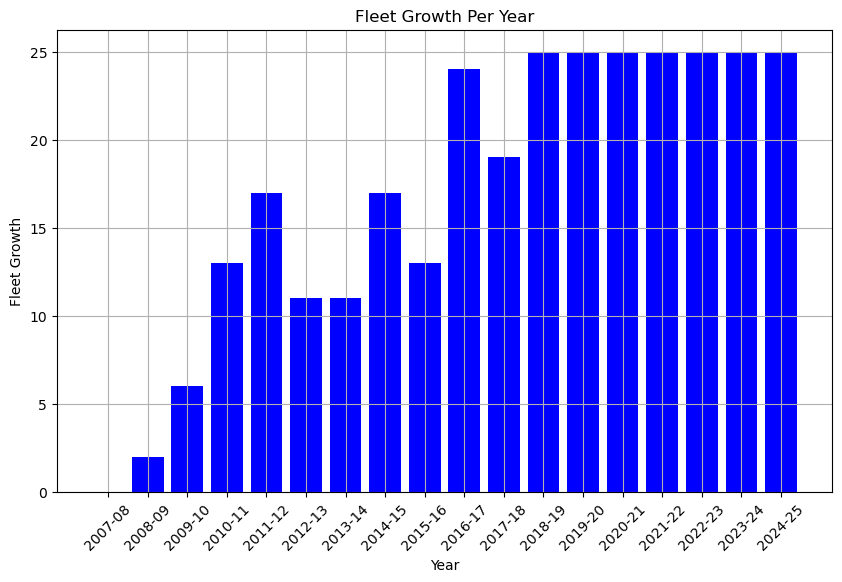

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(df2["Year"], df2["Fleet Growth"], color="Blue")
plt.title("Fleet Growth Per Year")
plt.xlabel("Year")
plt.ylabel("Fleet Growth")
plt.xticks(rotation=45)
plt.grid()
plt.show()


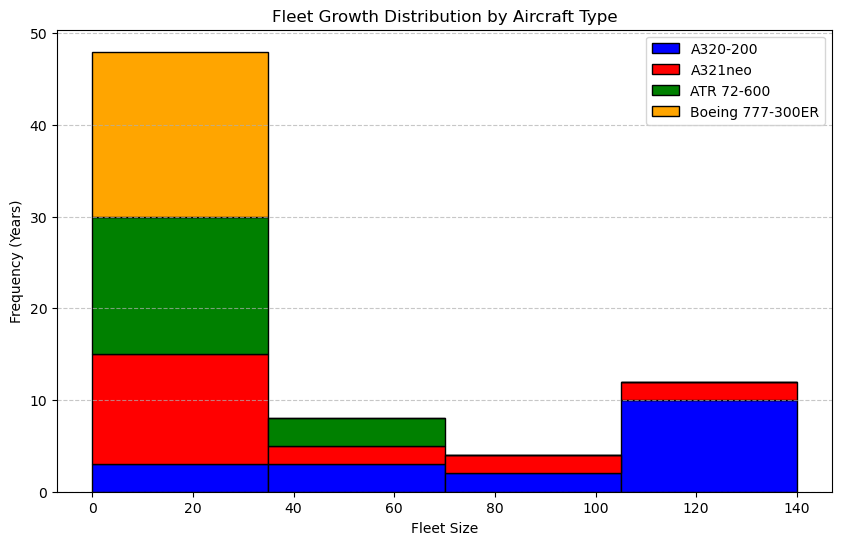

In [22]:
plt.figure(figsize=(10, 6))
plt.hist([df2["A320-200"], df2["A321neo"], df2["ATR 72-600"], df2["Boeing 777-300ER"]], 
         bins=4, stacked=True, color=["blue", "red", "green", "orange"], edgecolor="black")
plt.title("Fleet Growth Distribution by Aircraft Type")
plt.xlabel("Fleet Size")
plt.ylabel("Frequency (Years)")
plt.legend(["A320-200", "A321neo", "ATR 72-600", "Boeing 777-300ER"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Using Seaborn

**Pie Chart - Fleet Composition in 2024-25**

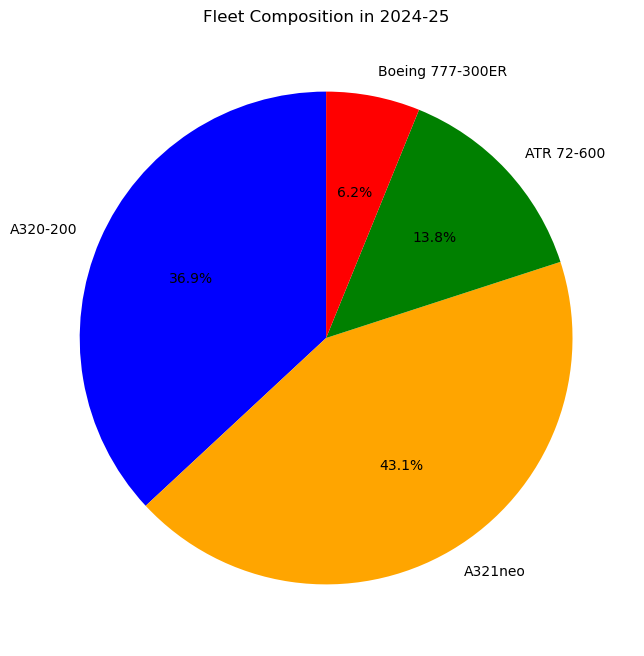

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(df2.iloc[-1, 2:6], labels=df2.columns[2:6], autopct="%1.1f%%", colors=["blue", "orange", "green", "red"], startangle=90)
plt.title("Fleet Composition in 2024-25")
plt.show()

**Pie Chart - Share of Fleet Growth in Last 5 Years**

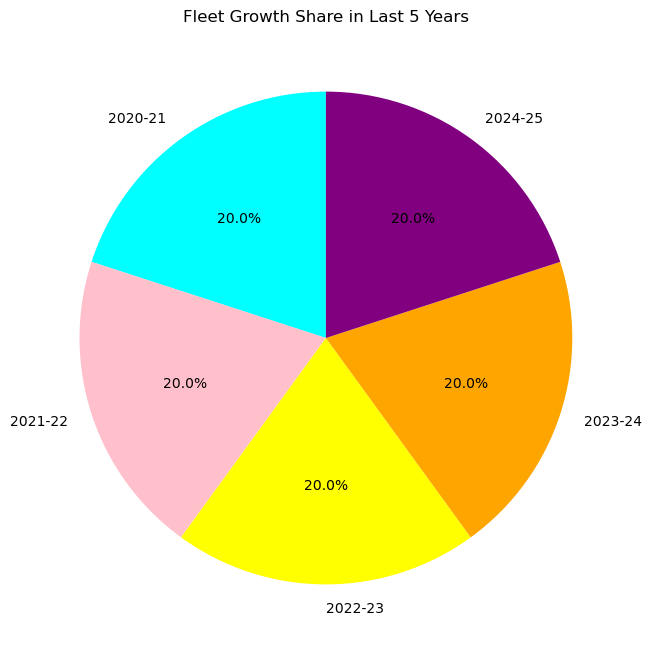

In [24]:
plt.figure(figsize=(8, 8))
plt.pie(df2["Fleet Growth"][-5:], labels=df2["Year"][-5:], autopct="%1.1f%%", colors=["cyan", "pink", "yellow", "orange", "purple"], startangle=90)
plt.title("Fleet Growth Share in Last 5 Years")
plt.show()

**Heatmap - Aircraft Correlations**

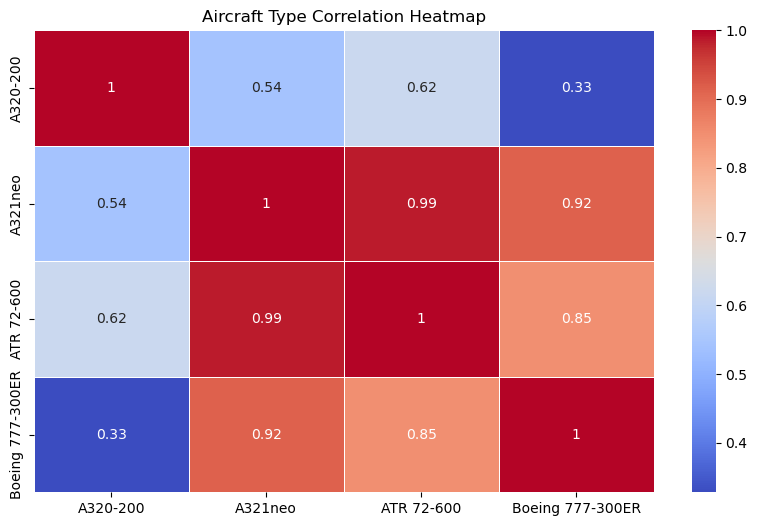

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.iloc[:, 2:6].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Aircraft Type Correlation Heatmap")
plt.show()

**Histogram - A320 Fleet Growth Distribution**

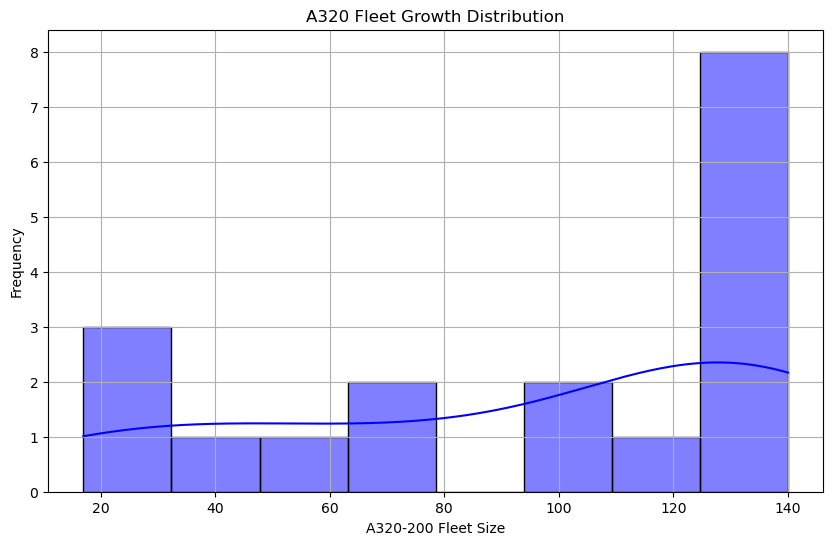

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df2["A320-200"], bins=8, kde=True, color="blue")
plt.title("A320 Fleet Growth Distribution")
plt.xlabel("A320-200 Fleet Size")
plt.ylabel("Frequency")
plt.grid()
plt.show()

**Pie Chart - Overall Fleet Size of each aircraft type**

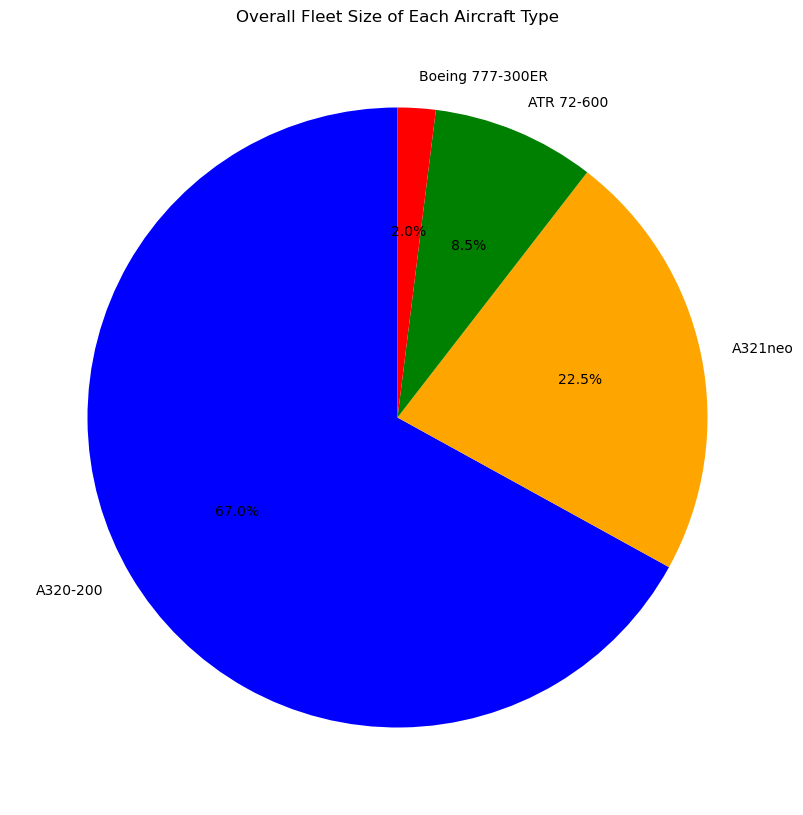

In [27]:
plt.figure(figsize=(10,15))
total_fleet = df2.iloc[:, 2:6].sum()
plt.pie(total_fleet, labels=total_fleet.index, autopct="%1.1f%%", colors=["blue", "orange", "green", "red"], startangle=90)
plt.title("Overall Fleet Size of Each Aircraft Type")
plt.show()


**Pie Chart - Maximum Impact That each Aircraft type made in its corresponding year**

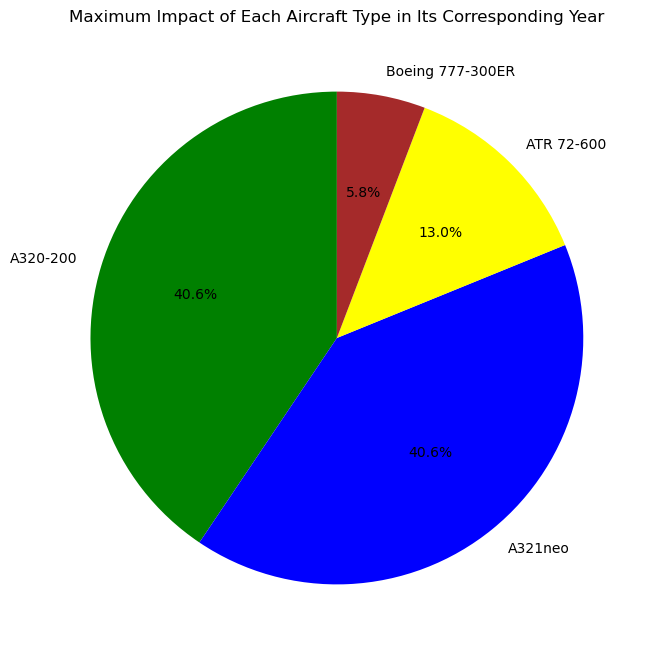

In [28]:
plt.figure(figsize=(8, 8))
max_impact = df2.iloc[:, 2:6].max() 
plt.pie(max_impact, labels=max_impact.index, autopct="%1.1f%%", colors=["green", "blue", "yellow", "brown"], startangle=90)
plt.title("Maximum Impact of Each Aircraft Type in Its Corresponding Year")
plt.show()